In [1]:
import numpy as np
import string
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
from UnFaIR import *
import scipy as sp

In [36]:
## Get all the data

obsv_concs = pd.read_csv('./Conc_fit_data/NOAA_Conc_data.csv',skiprows=4,header=None,index_col=0).dropna().iloc[:,:3].values
obsv_concs = pd.DataFrame(data=obsv_concs,index = np.arange(1979,2018),columns=['CO2','CH4','N2O'])

N2O_ems_1890_1990 = pd.read_csv('./Conc_fit_data/edgar_hyde1.4-glob_n2o.csv',index_col=0)
N2O_ems_1970_2012 = pd.read_csv('./Conc_fit_data/v432_N2O_1970_2012.csv',index_col=0)

CH4_ems_1850_2014 = pd.read_csv('./Conc_fit_data/CEDS_CH4_global_emissions_1850_2014.csv',index_col=0,names=['Year','CH4'])
CO2_ems_1750_2014 = pd.read_csv('./Conc_fit_data/CEDS_CO2_global_emissions_1750_2014.csv',index_col=0,names=['Year','CO2'])*(12/44)

RCP3PD_E = pd.read_csv('./RCP_data/RCP3PD_EMISSIONS.csv',skiprows=36,index_col=0)
RCP_ems = pd.DataFrame(data = np.array([RCP3PD_E[['OtherCO2','FossilCO2']].sum(axis=1).values,RCP3PD_E['CH4'].values,RCP3PD_E['N2O'].values]).T,columns=['CO2','CH4','N2O'],index = RCP3PD_E.index)

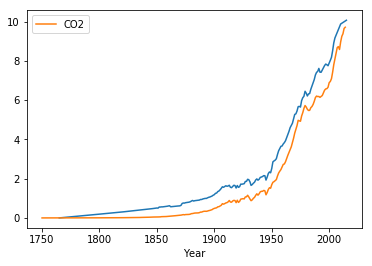

In [37]:
fig,ax=plt.subplots()
RCP_ems.CO2.loc[:2015].plot(ax=ax)
CO2_ems_1750_2014.plot(ax=ax)